# Introduction

Artificial Neural Networks (ANNs) are one of the most fundamental concepts in the field of machine learning and artificial intelligence. They are inspired by the structure and functionality of the human brain and are designed to recognize patterns, make predictions, and solve complex computational problems.

This project is aimed at learning the inner workings of an ANN by implementing it from scratch using Python. Unlike using pre-built libraries such as TensorFlow or PyTorch, building an ANN manually helps solidify understanding of key concepts like forward propagation, backward propagation, activation functions, and optimization algorithms. The project is solely for learning purposes, focusing on the foundational elements that make up a neural network.


# Objectives:

To understand the mechanics of how neural networks work.

To implement key components such as layers, activation functions, loss functions, and optimizers.

To gain hands-on experience in building and training a model from scratch.

# Steps to Build the ANN

1. Define the Problem and Dataset

    Focus on a regression problem.

    Prepare the dataset by normalizing features and splitting it into training and testing sets.
    

2. Design the Network Architecture

   Choose the number of input features, hidden layers, and one output neuron for regression.

   Use activation functions such as ReLU for hidden layers and a linear activation for the output layer.
   

3. Initialize Weights and Biases

    Randomly initialize weights and biases for all layers.

    Ensure appropriate initialization to avoid vanishing or exploding gradients.
    

4. Implement Forward Propagation

   Compute the weighted sum of inputs and apply activation functions for each layer.

   Produce a continuous output value suitable for regression tasks.
   

5. Define the Loss Function

   Use Mean Squared Error (MSE) as the loss function.

   Calculate the average squared difference between predicted and actual values.
   

6. Implement Backward Propagation

    Derive gradients of the MSE loss function with respect to weights and biases.

    Use the chain rule to propagate errors backward through the network.

    Implement gradient descent to update weights and biases. Include detailed comments or explanations on how gradients are  
    computed for each layer.



7. Train the Network

    Iterate through multiple epochs, performing forward and backward propagation for each batch of data.

    Adjust weights using the gradients computed during backpropagation.

    Monitor training loss to ensure the model is learning.

# Some Important Website Link
1. For vizualizing work of  Neural Network:
https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.18761&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false
2. for creating neural network:https://alexlenail.me/NN-SVG/

# Data Set Generation 

In [84]:
import pandas as pd
import numpy as np

# Seed for reproducibility
np.random.seed(42)

# Generate random data for X and Y
X = np.random.uniform(0, 10,5)  # X values between 0 and 100
Y = np.random.uniform(0, 10,5)  # Y values between 0 and 50

# Generate Z as a target variable with a linear relationship and some noise
Z = 2 * X + 3 * Y + np.random.normal(0,2,5)  # Z = 2*X + 3*Y + noise

# Convert data into a DataFrame
dataset = pd.DataFrame({
    'X': X,
    'Y': Y,
    'Z': Z
})

# Preview the dataset
print(dataset)


          X         Y          Z
0  3.745401  1.559945  11.231689
1  9.507143  0.580836  21.841915
2  7.319939  8.661761  39.698328
3  5.986585  6.011150  29.075161
4  1.560186  7.080726  24.846475


# correlation:

In [85]:
correlation_matrix = dataset.corr()

In [86]:
correlation_matrix

,X,Y,Z
X,1.000000,-0.288389,0.316712
Y,-0.288389,1.000000,0.813177
Z,0.316712,0.813177,1.000000


# Scatter plot:

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, '3D Scatter Plot')

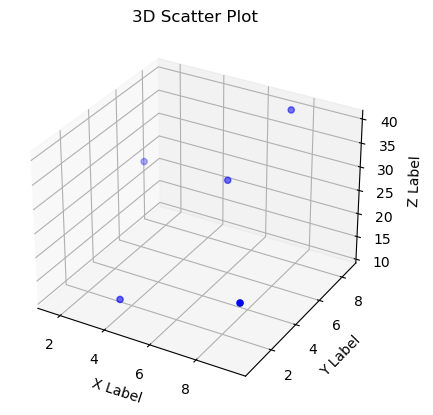

In [88]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot data points
ax.scatter(X, Y, Z, color='b', label='Data points')

# Labels and title
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Scatter Plot')

# ANN Class 


## according to the dataset the Structure that we are going to build is :

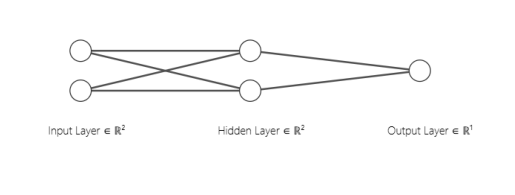

In [89]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image using matplotlib
image_path = 'archt.png'
img = mpimg.imread(image_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()


# Parameter Initialization

In [90]:
import numpy as np

def initialize_parameters(layer_dims):
    """
    Initialize the parameters of a neural network with random values.
    Arguments:
    layer_dims -- List containing the dimensions of each layer in the network.

    Returns:
    parameters -- Dictionary containing the initialized weights and biases.
    """
    np.random.seed(3)  # Set a seed for reproducibility
    parameters = {}
    L = len(layer_dims)  # Number of layers including input and output layers

    for l in range(1, L):
        # He initialization for weights
        parameters['W' + str(l)] = np.ones((layer_dims[l-1], layer_dims[l]))*0.1
        # Zeros for biases
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))

    return parameters


In [91]:
para=initialize_parameters([2,2,1]) #2-node input layer, 2 node in hidden layer, one output layer
para

{'W1': array([[0.1, 0.1],
        [0.1, 0.1]]),
 'b1': array([[0.],
        [0.]]),
 'W2': array([[0.1],
        [0.1]]),
 'b2': array([[0.]])}

weights are initialized with value 0.1 in first layer as well as second layer and biases are initialized by 0

# Calculation of output of any given node

In [92]:
def linear_forward(A_prev, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A_prev -- Activations from previous layer (or input data), shape: (n_prev, m)
    W -- Weights matrix, shape: (n_curr, n_prev)
    b -- Bias vector, shape: (n_curr, 1)

    Returns:
    Z -- The input to the activation function, shape: (n_curr, m)
    """
    Z = np.dot(W.T, A_prev) + b  # Adjust to W @ A_prev 
    return Z

## Example of output for the sample input x=1 and Y=2 

In [93]:
A_input = np.array([[1],
                    [2]]) 
Z1 = linear_forward(A_input, para["W1"], para["b1"])  # Compute Z1
A1 = Z1  # Linear activation function (A1 = Z1)

# Hidden to Output Layer
Z2 = linear_forward(A1, para["W2"], para["b2"])  # Compute Z2
A_output = Z2  # Linear activation function (A_output = Z2)

# Print results
print("Hidden layer output (A1):")
print(A1)
print("\nOutput layer result (A_output):")
print(A_output)

Hidden layer output (A1):
[[0.3]
 [0.3]]

Output layer result (A_output):
[[0.06]]


# Forward Propagartion

In [96]:
# Forward Prop (The above cell is written inside a function)
def L_layer_forward(X, parameters):

  A = X
  L = len(parameters) // 2                  # number of layers in the neural network
  
  for l in range(1, L+1):
    A_prev = A 
    Wl = parameters['W' + str(l)]
    bl = parameters['b' + str(l)]
    print("A"+str(l-1)+": ", A_prev)
    print("W"+str(l)+": ", Wl)
    print("b"+str(l)+": ", bl)
    print("--"*20)

    A = linear_forward(A_prev, Wl, bl)
    print("A"+str(l)+": ", A)
    print("**"*20)
          
  return A,A_prev 

### Forward calculation in each layer:  with same example x1=1 and x2=2

In [97]:
L_layer_forward(A_input,para)

A0:  [[1]
 [2]]
W1:  [[0.1 0.1]
 [0.1 0.1]]
b1:  [[0.]
 [0.]]
----------------------------------------
A1:  [[0.3]
 [0.3]]
****************************************
A1:  [[0.3]
 [0.3]]
W2:  [[0.1]
 [0.1]]
b2:  [[0.]]
----------------------------------------
A2:  [[0.06]]
****************************************


(array([[0.06]]),
 array([[0.3],
        [0.3]]))

## Parameter Updation for backpropagation with SGD:

In [98]:
def update_parameters(parameters,y,y_hat,A1,X):
  parameters['W2'][0][0] = parameters['W2'][0][0] + (0.001 * 2 * (y - y_hat)*A1[0][0])
  parameters['W2'][1][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat)*A1[1][0])
  parameters['b2'][0][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat))

  parameters['W1'][0][0] = parameters['W1'][0][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0]*X[0][0])
  parameters['W1'][0][1] = parameters['W1'][0][1] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0]*X[1][0])
  parameters['b1'][0][0] = parameters['b1'][0][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0])

  parameters['W1'][1][0] = parameters['W1'][1][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0]*X[0][0])
  parameters['W1'][1][1] = parameters['W1'][1][1] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0]*X[1][0])
  parameters['b1'][1][0] = parameters['b1'][1][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0])

SGD is used here. derivation of formulas are given in note. A1 is the output before output layer it helps to calculate parameters.

## Now let us see an example how the parameters will be updated ? just one step 

In [99]:
X = dataset[['X', 'Y']].values[0].reshape(2,1) # Shape(no of features, no. of training example)
y = dataset[['Z']].values[0][0]

# Parameter initialization
parameters = initialize_parameters([2,2,1])

y_hat,A1 = L_layer_forward(X, parameters)

y_hat=y_hat[0][0]
y_hat

A0:  [[3.74540119]
 [1.5599452 ]]
W1:  [[0.1 0.1]
 [0.1 0.1]]
b1:  [[0.]
 [0.]]
----------------------------------------
A1:  [[0.53053464]
 [0.53053464]]
****************************************
A1:  [[0.53053464]
 [0.53053464]]
W2:  [[0.1]
 [0.1]]
b2:  [[0.]]
----------------------------------------
A2:  [[0.10610693]]
****************************************


0.10610692783671304

In [100]:
update_parameters(parameters,y,y_hat,A1,X)

In [101]:
parameters

{'W1': array([[0.10931778, 0.10388082],
        [0.10931778, 0.10388082]]),
 'b1': array([[0.00248779],
        [0.00248779]]),
 'W2': array([[0.11180501],
        [0.11180501]]),
 'b2': array([[0.13405618]])}

In [102]:
y_hat,A1 = L_layer_forward(X, parameters)

y_hat=y_hat[0][0]
y_hat

A0:  [[3.74540119]
 [1.5599452 ]]
W1:  [[0.10931778 0.10388082]
 [0.10931778 0.10388082]]
b1:  [[0.00248779]
 [0.00248779]]
----------------------------------------
A1:  [[0.58245647]
 [0.55361152]]
****************************************
A1:  [[0.58245647]
 [0.55361152]]
W2:  [[0.11180501]
 [0.11180501]]
b2:  [[0.13405618]]
----------------------------------------
A2:  [[0.26107428]]
****************************************


0.26107427528976423

# Ultimate Implementation

In [103]:
# epochs implementation

parameters = initialize_parameters([2,2,1])
epochs =5

for i in range(epochs):

  Loss = []

  for j in range(dataset.shape[0]):

    X = dataset[['X', 'Y']].values[j].reshape(2,1) # Shape(no of features, no. of training example)
    y = dataset[['Z']].values[j][0]

    # Parameter initialization


    y_hat,A1 = L_layer_forward(X,parameters)
    y_hat = y_hat[0][0]

    update_parameters(parameters,y,y_hat,A1,X)
    #print("-----------------LOSS")
    #print((y-y_hat)**2)

    Loss.append((y-y_hat)**2)

  print('Epoch - ',i+1,'Loss - ',np.array(Loss).mean())

parameters

A0:  [[3.74540119]
 [1.5599452 ]]
W1:  [[0.1 0.1]
 [0.1 0.1]]
b1:  [[0.]
 [0.]]
----------------------------------------
A1:  [[0.53053464]
 [0.53053464]]
****************************************
A1:  [[0.53053464]
 [0.53053464]]
W2:  [[0.1]
 [0.1]]
b2:  [[0.]]
----------------------------------------
A2:  [[0.10610693]]
****************************************
A0:  [[9.50714306]
 [0.58083612]]
W1:  [[0.10931778 0.10388082]
 [0.10931778 0.10388082]]
b1:  [[0.00248779]
 [0.00248779]]
----------------------------------------
A1:  [[1.10528326]
 [1.05043533]]
****************************************
A1:  [[1.10528326]
 [1.05043533]]
W2:  [[0.11180501]
 [0.11180501]]
b2:  [[0.13405618]]
----------------------------------------
A2:  [[0.37507632]]
****************************************
A0:  [[7.31993942]
 [8.66176146]]
W1:  [[0.17432353 0.10785233]
 [0.17336235 0.1077936 ]]
b1:  [[0.00932536]
 [0.00922426]]
----------------------------------------
A1:  [[2.78698633]
 [1.73237923]]
*******

{'W1': array([[0.85732681, 1.54144294],
        [0.78019775, 1.37506946]]),
 'b1': array([[0.15352643],
        [0.13656764]]),
 'W2': array([[1.17234369],
        [1.08986934]]),
 'b2': array([[1.09999331]])}